## EDA

In [1]:
import pandas as pd
import sys, os

sys.path.append(os.path.abspath(os.path.join('../utils')))

In [2]:
from eda_helpers import EDA
from data_processing import DataProcessor
from plot import Plotter

In [3]:
eda = EDA('../data/processed')
eda.load_cleaned_data()
plotter=Plotter()

In [4]:
data_processer=DataProcessor()

In [5]:

cleaned_trips_df = eda.cleaned_trip
cleaned_requests_df = eda.cleaned_requests

In [6]:
cleaned_trips_df

,order_id,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
...,...,...,...,...,...
534363,1637696,"6.448218499999999,3.4772075","6.437787399999999,3.481670199999999",2021-12-30 20:35:06,2021-12-30 21:02:59
534364,1637702,"6.442320899999999,3.4736868","6.436589333407897,3.5559738188407835",2021-12-30 20:48:13,2021-12-30 21:43:49
534365,1637704,"6.4281982,3.492248","6.448088500000001,3.4775747",2021-12-30 20:51:45,2021-12-30 21:41:32
534366,1637705,"6.5869296,3.3632966","6.637906899999999,3.3339515",2021-12-30 20:48:50,2021-12-30 21:08:28


In [7]:
cleaned_requests_df

,id,order_id,driver_id,driver_action,lat,lng
0,1,392001,243828,accepted,6.602207,3.270465
1,2,392001,243588,rejected,6.592097,3.287445
2,3,392001,243830,rejected,6.596133,3.281784
3,4,392001,243539,rejected,6.596142,3.280526
4,5,392001,171653,rejected,6.609232,3.288800
...,...,...,...,...,...,...
1557735,1557736,517948,243774,rejected,6.469036,3.566877
1557736,1557737,517948,245447,rejected,6.425431,3.527358
1557737,1557738,517948,239866,rejected,6.440013,3.525378
1557738,1557739,517948,243774,rejected,6.469036,3.566877


## Weekend or Weekdays

In [8]:
cleaned_trips_df['is_weekend'] = cleaned_trips_df['Trip Start Time'].apply(lambda x: data_processer.isWeekend(x))

In [9]:
cleaned_trips_df['is_weekend'].value_counts()

is_weekend
0    427181
1    107187
Name: count, dtype: int64

## chart for weekend

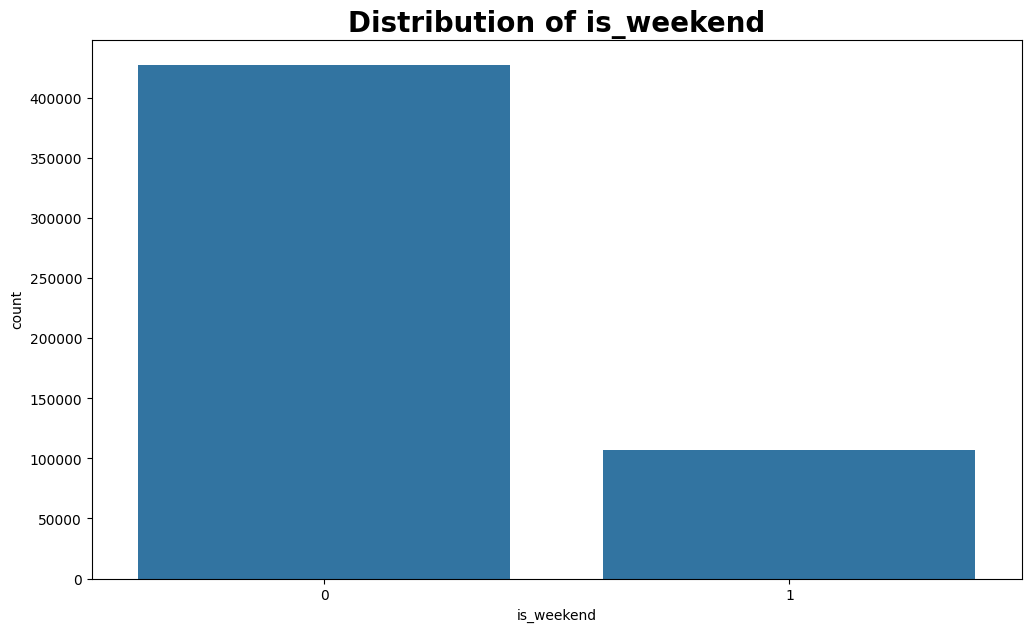

In [10]:
plotter.plot_count(cleaned_trips_df, 'is_weekend')

## Holiday or not Holiday

In [11]:
data_processer.print_holidays_in_year(2021)

Date: 2021-01-01, Holiday: New Year's Day
Date: 2021-04-02, Holiday: Good Friday
Date: 2021-04-05, Holiday: Easter Monday
Date: 2021-05-01, Holiday: Workers' Day
Date: 2021-05-03, Holiday: Workers' Day (observed)
Date: 2021-05-13, Holiday: Eid-el-Fitr (estimated)
Date: 2021-05-14, Holiday: Eid-el-Fitr Holiday (estimated)
Date: 2021-06-12, Holiday: Democracy Day
Date: 2021-06-14, Holiday: Democracy Day (observed)
Date: 2021-07-20, Holiday: Eid-el-Kabir (estimated)
Date: 2021-07-21, Holiday: Eid-el-Kabir Holiday (estimated)
Date: 2021-10-01, Holiday: Independence Day
Date: 2021-10-18, Holiday: Eid-el-Mawlid (estimated)
Date: 2021-12-25, Holiday: Christmas Day
Date: 2021-12-26, Holiday: Boxing Day
Date: 2021-12-27, Holiday: Christmas Day (observed)
Date: 2021-12-28, Holiday: Boxing Day (observed)
Total number of holidays in 2021: 17


In [12]:
cleaned_trips_df['is_holiday'] = cleaned_trips_df['Trip Start Time'].apply(lambda x: data_processer.isHoliday(x))

In [13]:
cleaned_trips_df['is_holiday'].value_counts()

is_holiday
0    518151
1     16217
Name: count, dtype: int64

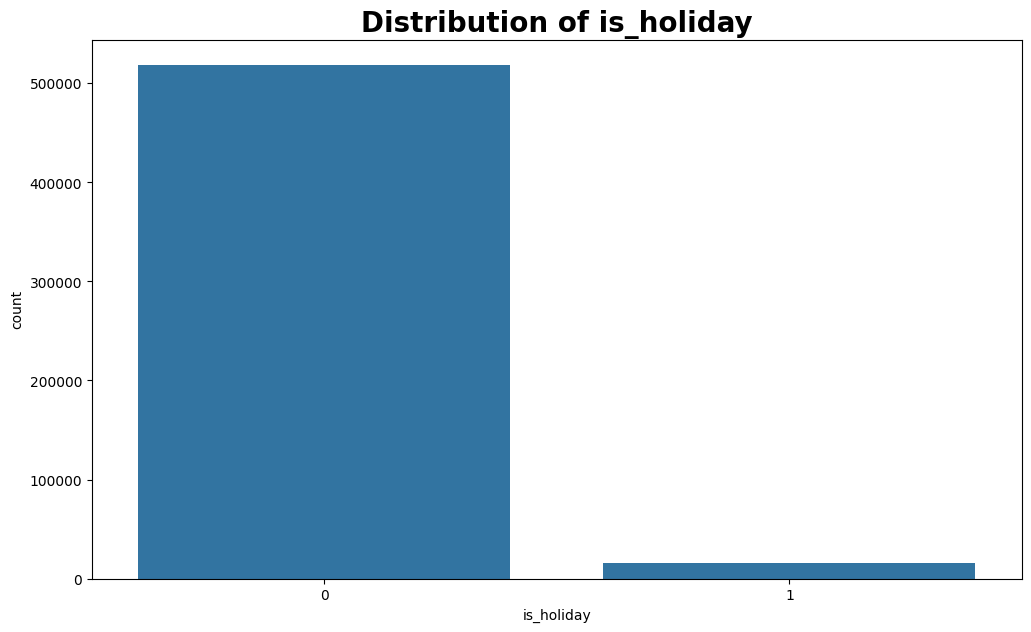

In [14]:
plotter.plot_count(cleaned_trips_df, 'is_holiday')

## Weather

## Extracting Distance from Start and End Cordinates

In [15]:
start_coordinates = cleaned_trips_df['Trip Origin'].tolist()
end_coordinates = cleaned_trips_df['Trip Destination'].tolist()


In [16]:
cleaned_trips_df['distance'] = data_processer.calculate_distances(start_coordinates, end_coordinates)

In [17]:
cleaned_trips_df

,order_id,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,is_weekend,is_holiday,distance
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,0,0,16.123451
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28,0,0,1.884305
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23,0,0,13.822393
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42,0,0,1.511034
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,0,0,20.984319
...,...,...,...,...,...,...,...,...
534363,1637696,"6.448218499999999,3.4772075","6.437787399999999,3.481670199999999",2021-12-30 20:35:06,2021-12-30 21:02:59,0,0,1.254752
534364,1637702,"6.442320899999999,3.4736868","6.436589333407897,3.5559738188407835",2021-12-30 20:48:13,2021-12-30 21:43:49,0,0,9.124781
534365,1637704,"6.4281982,3.492248","6.448088500000001,3.4775747",2021-12-30 20:51:45,2021-12-30 21:41:32,0,0,2.733704
534366,1637705,"6.5869296,3.3632966","6.637906899999999,3.3339515",2021-12-30 20:48:50,2021-12-30 21:08:28,0,0,6.504796


In [18]:
cleaned_trips_df['distance'].value_counts()

distance
2.467037     132
0.000000     121
8.040819     102
17.456076     95
22.388326     73
            ... 
29.752133      1
16.118600      1
1.470260       1
13.508368      1
22.657280      1
Name: count, Length: 466405, dtype: int64

In [19]:
cleaned_trips_df['distance'].describe()


count    534368.000000
mean         12.099944
std          11.025371
min           0.000000
25%           5.560137
50%          10.510731
75%          16.993866
max         680.080847
Name: distance, dtype: float64

In [20]:
# Distribution of distances
# plotter.plotly_plot_hist(cleaned_trips_df, 'distance')

#too gig to display and push in this notebook

In [21]:
# Distance ranges
temp_df = cleaned_trips_df.copy()
temp_df['distance_range'] = pd.cut(temp_df['distance'], bins=[0, 5, 10, 20,35, 50, 100, float('inf')], labels=['0-5 km', '5-10 km', '10-20 km', '20-34 km', '35-50 km' ,'50-100 km', 'more than 100 km'])
plotter.plotly_plot_pie(temp_df, 'distance_range')

/home/elias/Documents/10 Academy/Casual Inference/LogisticOptimization_CausalInference/utils/plot.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  a = pd.DataFrame({'count': df.groupby([column]).size()}).reset_index()


In [22]:
# plotter.plotly_plot_scatter(cleaned_trips_df, 'distance', 'order_id', 8)

## Speed Extraction from distance and Start and End Time

In [23]:
start_date_times = cleaned_trips_df['Trip Start Time'].tolist()
end_date_times = cleaned_trips_df['Trip End Time'].tolist()
distance_list = cleaned_trips_df['distance'].tolist()

In [24]:
cleaned_trips_df['speed'] = data_processer.calculate_speeds(start_date_times, end_date_times, distance_list)

In [25]:
cleaned_trips_df['speed'].describe()

count    534368.000000
mean         26.570109
std         244.737556
min           0.000000
25%           6.876641
50%          11.137487
75%          16.815436
max       66498.868759
Name: speed, dtype: float64

## Handeling Outliers

We'll find trips where the distance traveled is too high compared to the time taken. This could mean an error in the data, like a motorbike traveling an impossible distance in a short time. We'll identify these unusual trips to ensure our data is accurate.

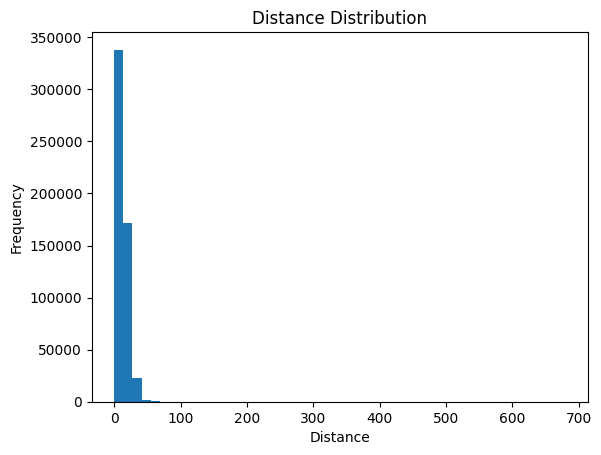

In [26]:
import matplotlib.pyplot as plt

plt.hist(cleaned_trips_df['distance'], bins=50)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distance Distribution')
plt.show()

In [27]:
data_processer.detect_outliers(cleaned_trips_df, "distance")
data_processer.count_outliers(cleaned_trips_df, "distance")
# plotter.plot_count(cleaned_trips_df, 'is_holiday')

Lower bound for outliers: -11.59
Upper bound for outliers: 34.14
Data points above upper bound (34.14): 5948
Data points below lower bound (-11.59): 0


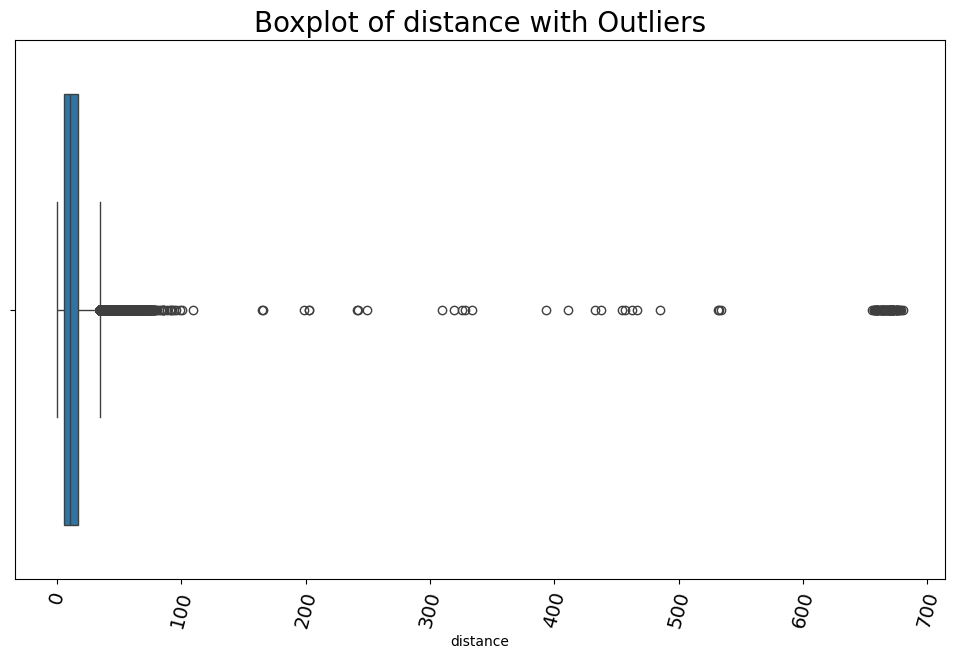

In [28]:
#   Visualising outliers in distance

plotter.plot_box(cleaned_trips_df, "distance", f"Boxplot of {'distance'} with Outliers")

In [29]:
df_distance_outliers = cleaned_trips_df[cleaned_trips_df['distance']>34.14]

In [30]:
df_distance_outliers[['order_id', 'Trip Start Time', 'Trip End Time', 'distance', 'speed']]


,order_id,Trip Start Time,Trip End Time,distance,speed
20,392040,2021-07-01 10:15:03,2021-07-01 13:52:01,35.223180,9.740624
132,392276,2021-07-01 08:27:57,2021-07-01 10:10:38,38.145450,22.289177
517,392943,2021-07-01 10:48:38,2021-07-01 10:56:04,34.173483,275.839777
710,393272,2021-07-01 10:46:19,2021-07-01 12:01:52,34.566226,27.451668
890,393572,2021-07-01 11:48:09,2021-07-01 11:52:32,52.840859,723.296929
...,...,...,...,...,...
533461,1635540,2021-12-30 15:21:21,2021-12-30 18:11:25,36.400508,12.842202
533632,1635943,2021-12-30 15:43:43,2021-12-31 06:19:45,37.150996,2.544492
533827,1636462,2021-12-30 16:38:05,2021-12-30 18:18:23,35.019266,20.948714
534015,1636884,2021-12-30 17:41:36,2021-12-30 21:40:28,37.531234,9.427326


/tmp/ipykernel_6802/1915138890.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_6802/1915138890.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



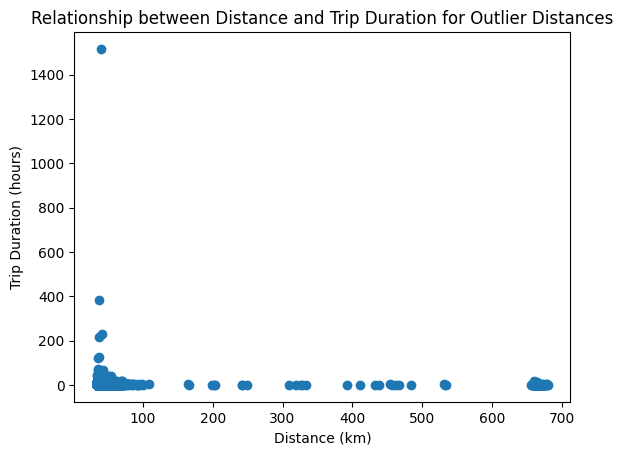

In [31]:
import matplotlib.pyplot as plt

# Convert Trip Start Time and Trip End Time to datetime format
df_distance_outliers['Trip Start Time'] = pd.to_datetime(df_distance_outliers['Trip Start Time'])
df_distance_outliers['Trip End Time'] = pd.to_datetime(df_distance_outliers['Trip End Time'])

# Calculate trip duration
trip_durations = (df_distance_outliers['Trip End Time'] - df_distance_outliers['Trip Start Time']).dt.total_seconds() / 3600

# Plot the scatter plot
plt.scatter(df_distance_outliers['distance'], trip_durations)
plt.xlabel('Distance (km)')
plt.ylabel('Trip Duration (hours)')
plt.title('Relationship between Distance and Trip Duration for Outlier Distances')
plt.show()

### Remove entire rows with outlier on distance column

In [32]:
df_clean_trip = data_processer.remove_outliers(cleaned_trips_df, 'distance')


##RUN IT LATER

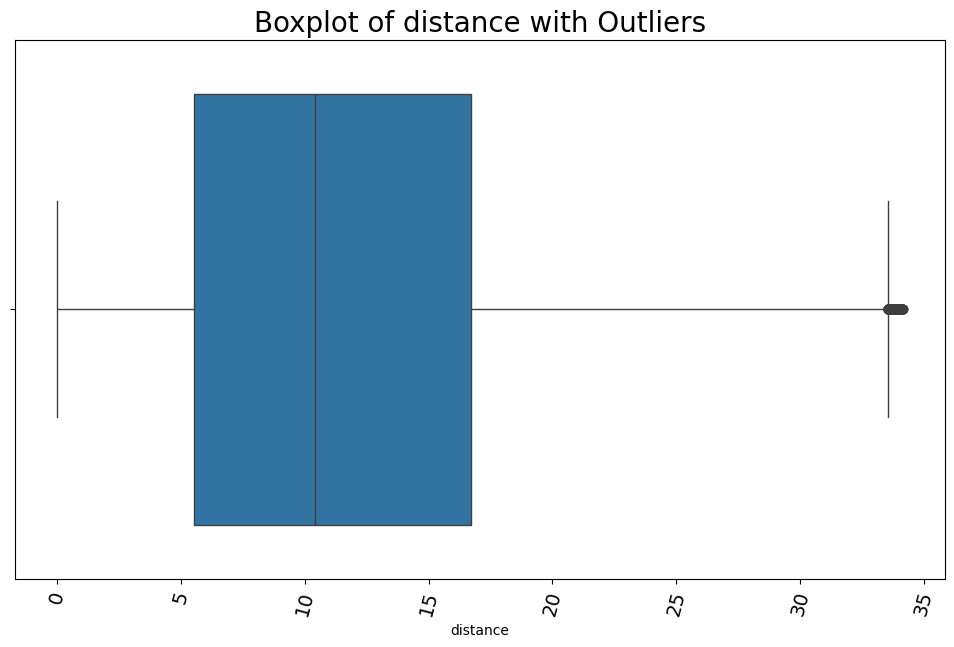

In [33]:
plotter.plot_box(df_clean_trip, "distance", f"Boxplot of {'distance'} with Outliers")

In [34]:
df_clean_trip.shape

(528420, 9)

## Speed

In [35]:
cleaned_trips_df['speed'].value_counts()

speed
0.000000      126
109.417117      3
744.469810      3
1.475404        2
31.422211       2
             ... 
13.350979       1
727.748995      1
6.209781        1
21.362164       1
15.211900       1
Name: count, Length: 534126, dtype: int64

In [36]:
cleaned_trips_df['speed'].describe()



count    534368.000000
mean         26.570109
std         244.737556
min           0.000000
25%           6.876641
50%          11.137487
75%          16.815436
max       66498.868759
Name: speed, dtype: float64

In [37]:
data_processer.detect_outliers(cleaned_trips_df, "speed")
data_processer.count_outliers(cleaned_trips_df, "speed")

Lower bound for outliers: -8.03
Upper bound for outliers: 31.72
Data points above upper bound (31.72): 38706
Data points below lower bound (-8.03): 0


## Request Data

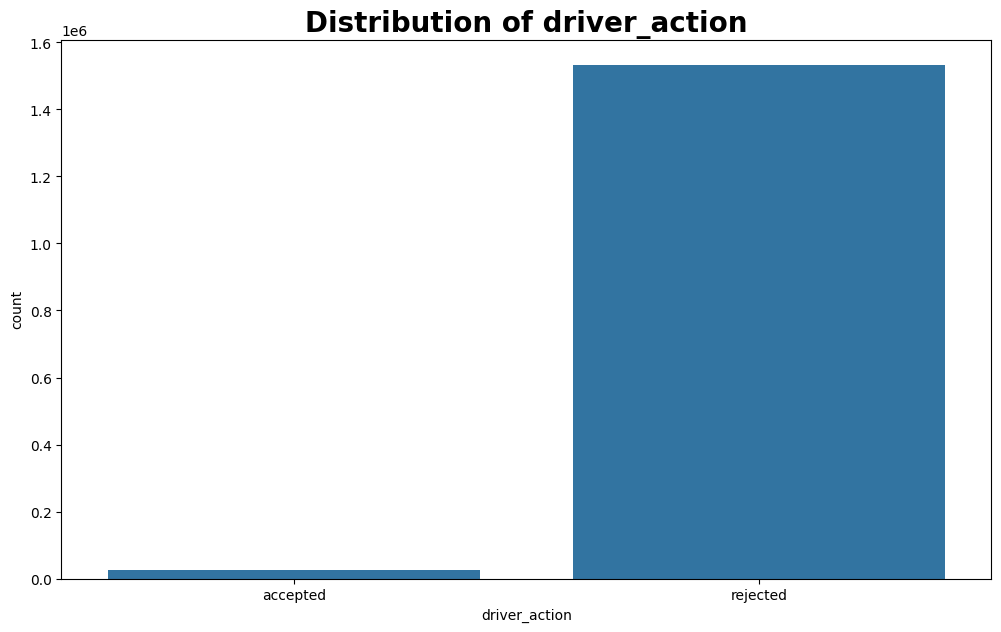

In [38]:
plotter.plot_count(cleaned_requests_df, 'driver_action')

In [39]:
# plotter.plotly_plot_scatter(cleaned_requests_df, 'lng', 'lat', marker_size=5, hover=['driver_action'])

In [40]:
# import matplotlib.pyplot as plt

# def plot_driver_action_lat(df):
#     plt.figure(figsize=(12, 7))
#     for action in df['driver_action'].unique():
#         df_action = df[df['driver_action'] == action]
#         plt.bar(df_action['lat'], df_action['lat'].count(), label=action)
#     plt.title('Distribution of Driver Actions along Latitude')
#     plt.xlabel('Latitude')
#     plt.ylabel('Count of Driver Actions')
#     plt.legend()
#     plt.show()

# plot_driver_action_lat(cleaned_requests_df)

In [43]:
df_clean_trip

,order_id,Trip Origin,Trip Destination,Trip Start Time,Trip End Time,is_weekend,is_holiday,distance,speed
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37,0,0,16.123451,624.133590
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28,0,0,1.884305,3.845521
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23,0,0,13.822393,20.056676
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42,0,0,1.511034,6.674507
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36,0,0,20.984319,348.126952
...,...,...,...,...,...,...,...,...,...
534363,1637696,"6.448218499999999,3.4772075","6.437787399999999,3.481670199999999",2021-12-30 20:35:06,2021-12-30 21:02:59,0,0,1.254752,2.700005
534364,1637702,"6.442320899999999,3.4736868","6.436589333407897,3.5559738188407835",2021-12-30 20:48:13,2021-12-30 21:43:49,0,0,9.124781,9.846886
534365,1637704,"6.4281982,3.492248","6.448088500000001,3.4775747",2021-12-30 20:51:45,2021-12-30 21:41:32,0,0,2.733704,3.294722
534366,1637705,"6.5869296,3.3632966","6.637906899999999,3.3339515",2021-12-30 20:48:50,2021-12-30 21:08:28,0,0,6.504796,19.878833


In [42]:
df_clean_trip.to_csv("../data/processed/preprocessed_trip.csv")